## Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from collections import Counter

In [2]:
PATH = "path"

In [3]:
train = pd.read_csv(os.path.join(PATH,"train.csv"))
train

,sentence_id,sentence,label
0,d1264074-9bfb-45e4-b8f8-3e2ecd91ec2e,commitment government make seem start slogan p...,1
1,e14d1c51-0140-45f8-b234-0d29d271cec0,per capita cost government increase follow 188...,0
2,ad238ccb-6a49-4e20-ba92-626b605e2f15,public credit nation different .,0
3,33e18126-bf59-4bf8-a9c4-e93d53f477bd,sunday anti - pride demonstrator include biker...,0
4,2d9bea46-05b1-4927-8ff4-0dbb817df26c,price increase also see good service directly ...,0
...,...,...,...
746,4a0e8f3f-8d20-496f-99fc-64f0bf161e97,bad banking wild speculation senseless credit ...,1
747,92e86c80-4f4a-4897-8c56-9aad2ea235c2,pain terror government arrest growth .,1
748,fe0525b4-8d85-4780-979f-4f62265ba858,turbulent world strength bring london back att...,0
749,fb874272-d549-4bb4-b164-b6d3db3d0eda,explanation simple .,1


## Visualizing the number of phrases that belong to a specific category

In [4]:
value_counts = train['label'].value_counts()
value_counts.index = ['OBJ', 'SUBJ']

total = value_counts.sum()
percentage_OBJ = int((int(value_counts.OBJ)/int(total))*100)
percentage_SUBJ = 100-percentage_OBJ

print(f"Total number of phrases: {total}")
print(f"Percentage split of objective phrases and subjective phrases is {percentage_OBJ}:{percentage_SUBJ}")

Total number of phrases: 751
Percentage split of objective phrases and subjective phrases is 60:40


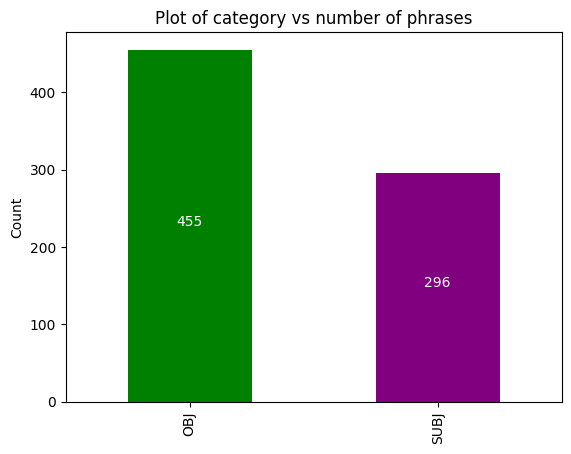

In [5]:
ax = value_counts.plot(kind='bar', color=['green', 'purple'])
plt.title('Plot of category vs number of phrases')
plt.ylabel('Count')

for i, v in enumerate(value_counts):
  ax.text(i, v - (v//2), str(v), color='white', ha='center')

plt.show()

## Determining the number of unique words

In [6]:
all_sentences = ' '.join(train['sentence'].astype(str))

words = pd.Series(all_sentences.split())

word_counts = words.value_counts()
top_words = word_counts.head(50)

print(f"Number of unique words: {len(word_counts)}")

Number of unique words: 3218


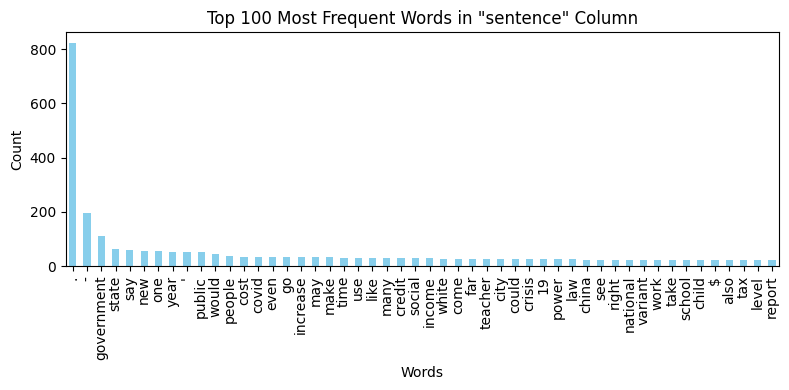

In [7]:
plt.figure(figsize=(8, 4))
top_words.plot(kind='bar', rot=90, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 100 Most Frequent Words in "sentence" Column')
plt.tight_layout()

plt.show()

## Visualizing phrase length

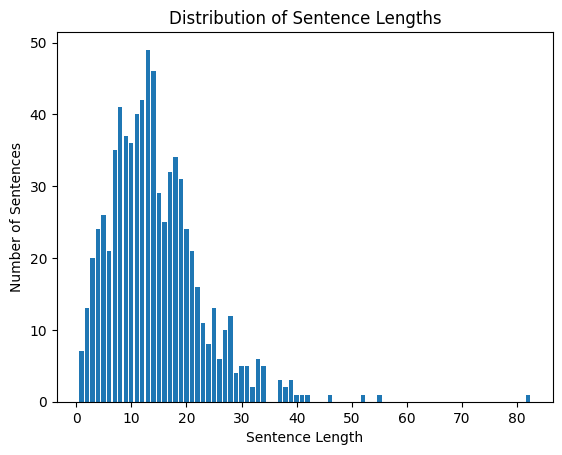

Smallest Sentence Length: 1 words
Largest Sentence Length: 82 words
Average Sentence Length: 14.43 words


In [8]:
train['sentence_length'] = train['sentence'].astype(str).apply(lambda x: len(x.split()))
min_length = train['sentence_length'].min()
max_length = train['sentence_length'].max()

# Step 3: Calculate the average sentence length
average_length = train['sentence_length'].mean()

# Step 4: Plot a graph
sentence_lengths = train['sentence_length'].value_counts().sort_index()

plt.bar(sentence_lengths.index, sentence_lengths.values)
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')
plt.title('Distribution of Sentence Lengths')
plt.show()

# Step 5: Print the results
print(f"Smallest Sentence Length: {min_length} words")
print(f"Largest Sentence Length: {max_length} words")
print(f"Average Sentence Length: {average_length:.2f} words")

## Phrases with less than 4 words?

Questions:

* Characters such as $, -, ., %
* Removing all stop words causes some sentences to be less than 4 words. Examples shown below


In [9]:
train['sentence_split'] = train['sentence'].astype(str).apply(lambda x: x.split())

In [10]:
result_df = train[train['sentence_split'].apply(len) == 2]

In [11]:
result_df

,sentence_id,sentence,label,sentence_length,sentence_split
15,6a77538f-492e-41cb-b6e9-2d686661c038,teacher unhappy,0,2,"[teacher, unhappy]"
54,b3a27024-066f-4f6e-bcef-7ac239f61752,course .,1,2,"[course, .]"
127,2c132292-84eb-4be6-bd1a-8059784657a8,racist .,1,2,"[racist, .]"
165,c3be38ac-cd1d-4e58-b351-b02887963ace,teacher unhappy,0,2,"[teacher, unhappy]"
176,1740ae0d-8ea6-4f93-bbd5-a3275b5e8d97,teacher unhappy,0,2,"[teacher, unhappy]"
177,5891befb-11d7-4802-91e6-170dfe2b2d5e,course .,0,2,"[course, .]"
275,d1b8921c-658c-4422-ad6c-3ff0666c79f4,popular taxis,0,2,"[popular, taxis]"
283,07909b41-957d-437c-abbd-a312cc12bf7e,go .,0,2,"[go, .]"
307,1e998db4-55ec-4ada-af94-7b451434fcb9,predictive programming,1,2,"[predictive, programming]"
413,7d348c76-ca27-416a-a0b8-32975447061c,drown .,0,2,"[drown, .]"
